Import Libraries

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

Load Dataset

In [31]:
# Load the dataset
data = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')

# Convert diagnosis to numerical values
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Drop the 'id' column as it is not useful for prediction
data.drop(columns=['id'], inplace=True)

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Exploratory Data Analysis (EDA)

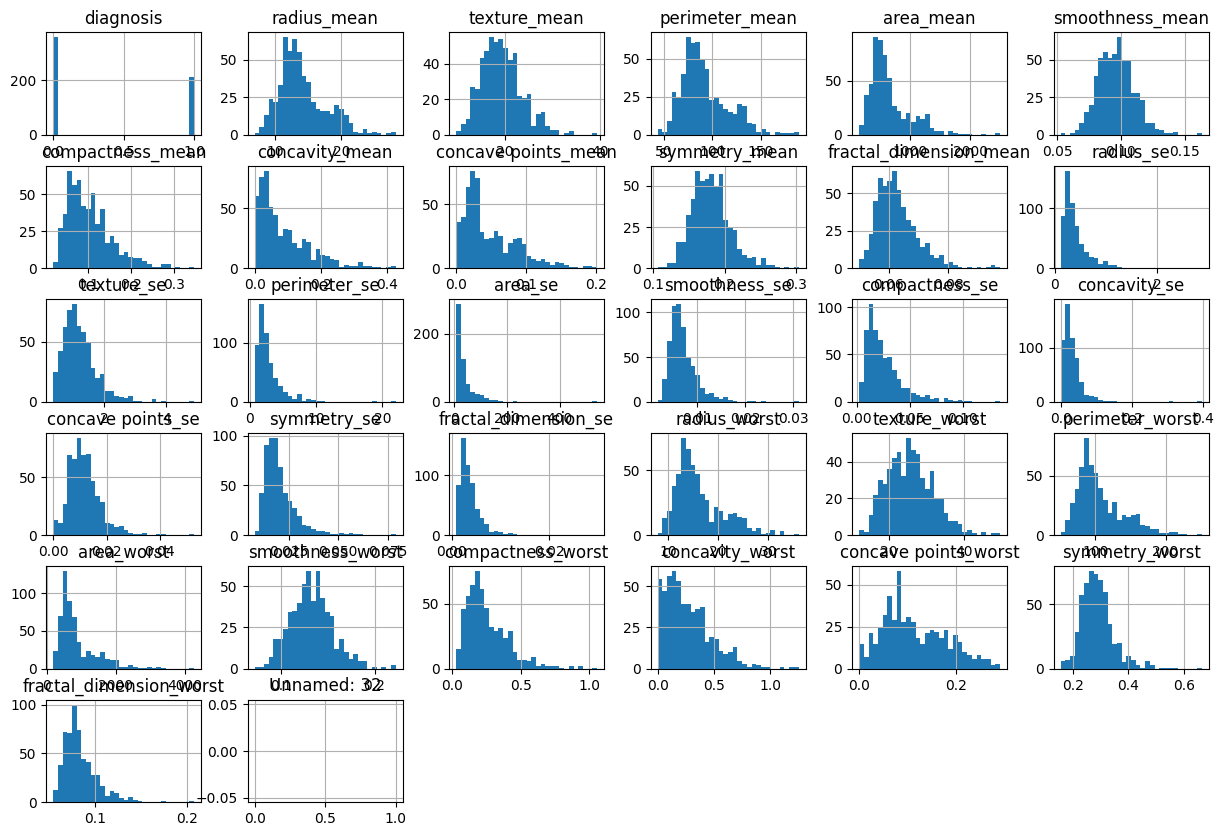

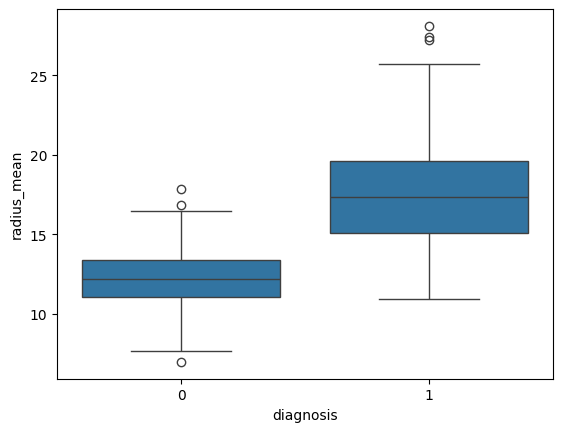

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of features
data.hist(bins=30, figsize=(15, 10))
plt.show()

# Box plot for a specific feature
sns.boxplot(x='diagnosis', y='radius_mean', data=data)
plt.show()

Prepare the Data

In [27]:
# Features and target variable
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Implement K-Nearest Neighbors (KNN)

In [28]:
# Check for missing values in X_train and X_test
print(np.isnan(X_train).sum())
print(np.isnan(X_test).sum())

# If missing values exist, impute them using the mean
if np.isnan(X_train).any() or np.isnan(X_test).any():
  imputer = SimpleImputer(strategy='mean')
  X_train = imputer.fit_transform(X_train)
  X_test = imputer.transform(X_test)

455
114


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [30]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: [30]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [21]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
knn_predictions = knn.predict(X_test)

Evaluate KNN Model

In [32]:
# KNN performance metrics
print("KNN Classification Report:")
print(classification_report(y_test, knn_predictions))

print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_predictions))

print("KNN Accuracy Score:", accuracy_score(y_test, knn_predictions))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

KNN Confusion Matrix:
[[68  3]
 [ 3 40]]
KNN Accuracy Score: 0.9473684210526315


Implement Logistic Regression

In [33]:
# Initialize Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
log_reg_predictions = log_reg.predict(X_test)

Evaluate Logistic Regression Model


In [34]:
# Logistic Regression performance metrics
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, log_reg_predictions))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, log_reg_predictions))

print("Logistic Regression Accuracy Score:", accuracy_score(y_test, log_reg_predictions))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Logistic Regression Confusion Matrix:
[[70  1]
 [ 2 41]]
Logistic Regression Accuracy Score: 0.9736842105263158


Compare the Models


In [35]:
print("\nComparison of Model Accuracies:")
print(f"KNN Accuracy: {accuracy_score(y_test, knn_predictions)}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, log_reg_predictions)}")



Comparison of Model Accuracies:
KNN Accuracy: 0.9473684210526315
Logistic Regression Accuracy: 0.9736842105263158


Visualization

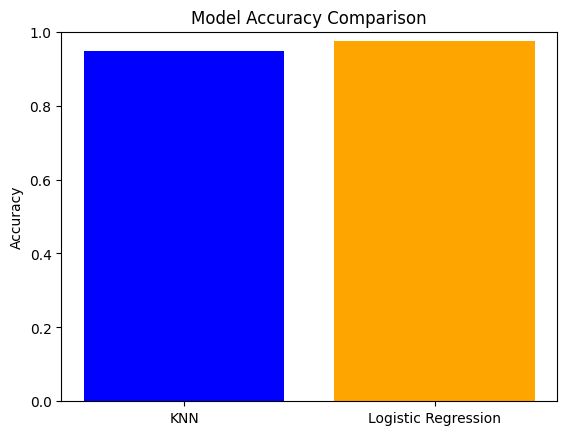

In [38]:
models = ['KNN', 'Logistic Regression']
accuracies = [accuracy_score(y_test, knn_predictions), accuracy_score(y_test, log_reg_predictions)]

plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0, 1])
plt.show()